In [2]:
#import libraries
import tensorflow
from tensorflow.keras import datasets , models,layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load dataset
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [4]:
x_train =x_train/255 #divided by 255 
x_test = x_test/255

divided by 255 because 255 is the largest pixel value of an image. 0-255 pixel value are used to represent any color in a image

In [5]:
x_train[0] #it shows the pixel values of image in x_train at zero index 

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [6]:
x_train.shape

(50000, 32, 32, 3)

This shows the shape of x_train

In [7]:
y_train[:5] # first five element of classes 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,) #reshape from 2D to 1D array
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']#sequence of classes

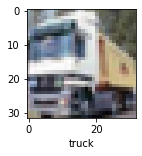

In [10]:
 
def label (x,y,index):
    
    plt.figure(figsize = (15,2))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y[index]])
label(x_train,y_train,1)


# ANN 


In [10]:
model = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1500, activation ='relu'),
    layers.Dense(700, activation = 'relu'),
    layers.Dense(10 , activation  = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.fit(x_train,y_train, epochs =2)

Epoch 1/2
1563/1563 [==============================] - 517s 329ms/step - loss: 1.9092 - accuracy: 0.2917
Epoch 2/2
1563/1563 [==============================] - 564s 361ms/step - loss: 1.7192 - accuracy: 0.3757


As you see ANN is not best for pictures dataset

# CNN

In [11]:
model1 =models.Sequential([
    layers.Conv2D(filters = 32 ,kernel_size=(3,3) , activation = 'relu' , input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters =64 ,kernel_size=(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters =128 ,kernel_size=(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10 , activation  = 'softmax')
    
])

In [12]:
model1.compile(optimizer = 'sgd', 
               loss = 'sparse_categorical_crossentropy' ,
               metrics = ['accuracy'])


In [14]:
model1.fit(x_train,y_train,epochs =50)

Epoch 1/50
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6533 - accuracy: 0.7753
Epoch 2/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6270 - accuracy: 0.7808
Epoch 3/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6048 - accuracy: 0.7883
Epoch 4/50
1563/1563 [==============================] - 54s 34ms/step - loss: 0.5803 - accuracy: 0.7986
Epoch 5/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.5592 - accuracy: 0.8067
Epoch 6/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.5335 - accuracy: 0.8134
Epoch 7/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5111 - accuracy: 0.8225
Epoch 8/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.4917 - accuracy: 0.8293
Epoch 9/50
1563/1563 [==============================] - 54s 35ms/step - loss: 0.4707 - accuracy: 0.8351
Epoch 10/50
1563/1563 [==============================] - 53s 34m

In [15]:
model1.evaluate(x_train,y_train)

1563/1563 [==============================] - 16s 9ms/step - loss: 0.0265 - accuracy: 0.9934


[0.026539521291851997, 0.9934399724006653]

In [16]:
y_test = y_test.reshape(-1,)

In [17]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 2.4187 - accuracy: 0.6959


[2.4186973571777344, 0.695900022983551]

In [18]:
y_pred = model1.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[1.3168703e-04, 5.2338706e-12, 1.4226774e-12, 9.9975020e-01,
        3.7395303e-08, 1.1808595e-04, 1.1887342e-09, 1.8917744e-13,
        5.0688835e-09, 4.1957536e-14],
       [4.7375415e-05, 2.2897886e-02, 3.7409263e-20, 6.3645039e-19,
        2.4317679e-22, 1.0722804e-19, 1.5299205e-24, 2.4281527e-22,
        9.7705472e-01, 2.6738630e-11],
       [5.0167018e-01, 2.1190729e-02, 1.3875837e-07, 2.0584114e-06,
        7.2461397e-08, 5.9785503e-05, 1.2646031e-10, 3.2418052e-10,
        4.7669119e-01, 3.8588772e-04],
       [9.9998784e-01, 5.4131890e-11, 3.3506251e-09, 1.5999869e-10,
        1.7403449e-09, 6.1656302e-18, 4.1326347e-13, 4.1320901e-17,
        1.2105814e-05, 7.3916337e-14],
       [3.4049062e-16, 7.4524853e-10, 2.5585392e-03, 2.4495038e-04,
        9.9328411e-01, 1.0690090e-12, 3.9123427e-03, 3.8768073e-17,
        3.6495766e-15, 5.2312728e-13]], dtype=float32)

In [19]:
np.argmax(y_pred[0]) #predicted value at index 0

3

In [20]:
y_test[0] #actual value at 0

3

As you both predicted and actual value is same 

In [21]:
y_classes = [np.argmax(index) for index in y_pred]
y_classes[:4]

[3, 8, 0, 0]

In [22]:
y_test[:4]

array([3, 8, 8, 0], dtype=uint8)

In [23]:
y_test = y_test.reshape(-1,)

In [24]:
y_test[:4]

array([3, 8, 8, 0], dtype=uint8)